In [1]:
import pandas as pd
df = pd.read_csv("provincial_postings_ca.csv")
df.head()

,date,province,indeed_job_postings_index
0,2020-02-01,ab,100.00
1,2020-02-02,ab,99.86
2,2020-02-03,ab,99.83
3,2020-02-04,ab,99.74
4,2020-02-05,ab,99.61


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16653 entries, 0 to 16652
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       16653 non-null  object 
 1   province                   16653 non-null  object 
 2   indeed_job_postings_index  16653 non-null  float64
dtypes: float64(1), object(2)
memory usage: 390.4+ KB


In [3]:
df.isnull().sum()

date                         0
province                     0
indeed_job_postings_index    0
dtype: int64

In [4]:
df.describe()

,indeed_job_postings_index
count,16653.000000
mean,138.960489
std,46.282526
min,46.240000
25%,102.540000
50%,143.940000
75%,169.920000
max,315.500000


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.dtypes

date                         datetime64[ns]
province                             object
indeed_job_postings_index           float64
dtype: object

In [7]:
df['province'].unique()

array(['ab', 'bc', 'mb', 'nb', 'nl', 'ns', 'nt', 'nu', 'on', 'pe', 'qc',
       'sk', 'yt'], dtype=object)

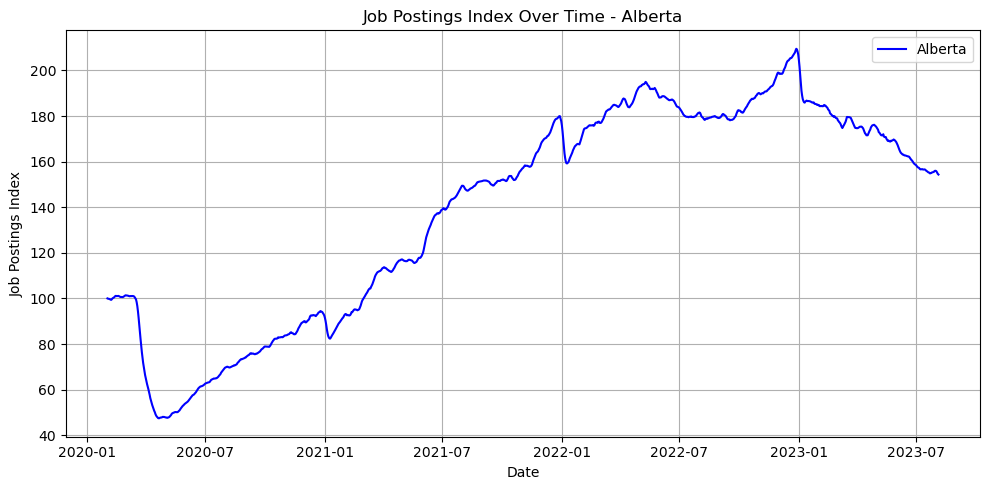

In [8]:
import matplotlib.pyplot as plt
ab_data = df[df['province'] == 'ab']
plt.figure(figsize=(10,5))
plt.plot(ab_data['date'], ab_data['indeed_job_postings_index'], label='Alberta', color='blue')
plt.title('Job Postings Index Over Time - Alberta')
plt.xlabel('Date')
plt.ylabel('Job Postings Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

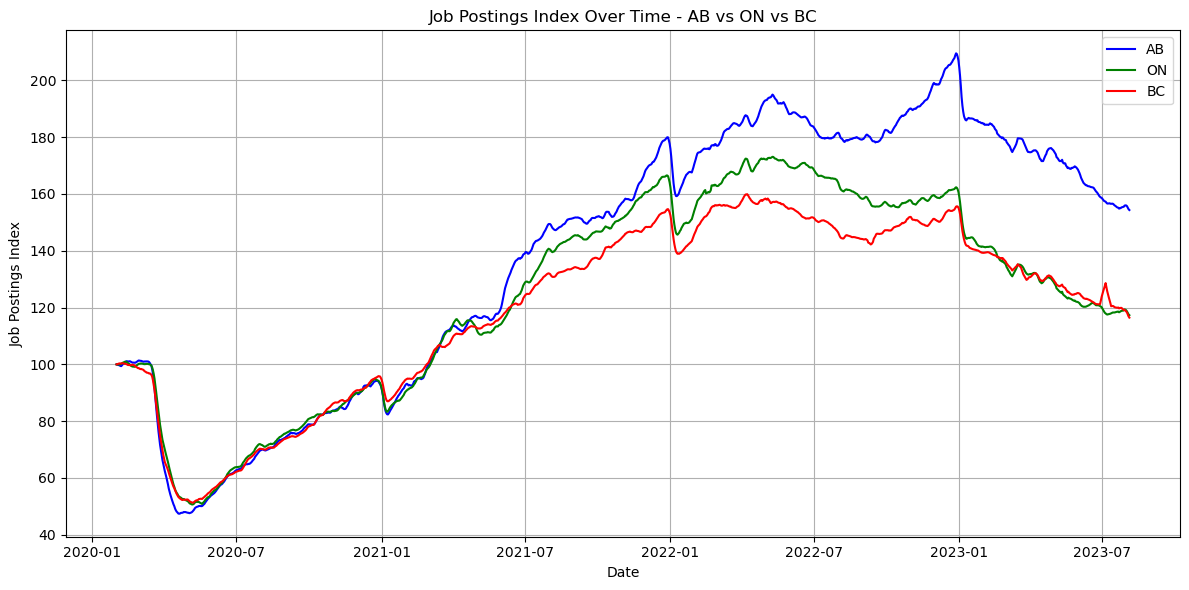

In [11]:
import matplotlib.pyplot as plt
plt.close('all')

provinces = ['ab', 'on', 'bc']
colors = ['blue', 'green', 'red']
plt.figure(figsize=(12,6))
for prov, color in zip(provinces, colors):
    subset = df[df['province'] == prov]
    plt.plot(subset['date'], subset['indeed_job_postings_index'], label=prov.upper(), color=color)
plt.title('Job Postings Index Over Time - AB vs ON vs BC')
plt.xlabel('Date')
plt.ylabel('Job Postings Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

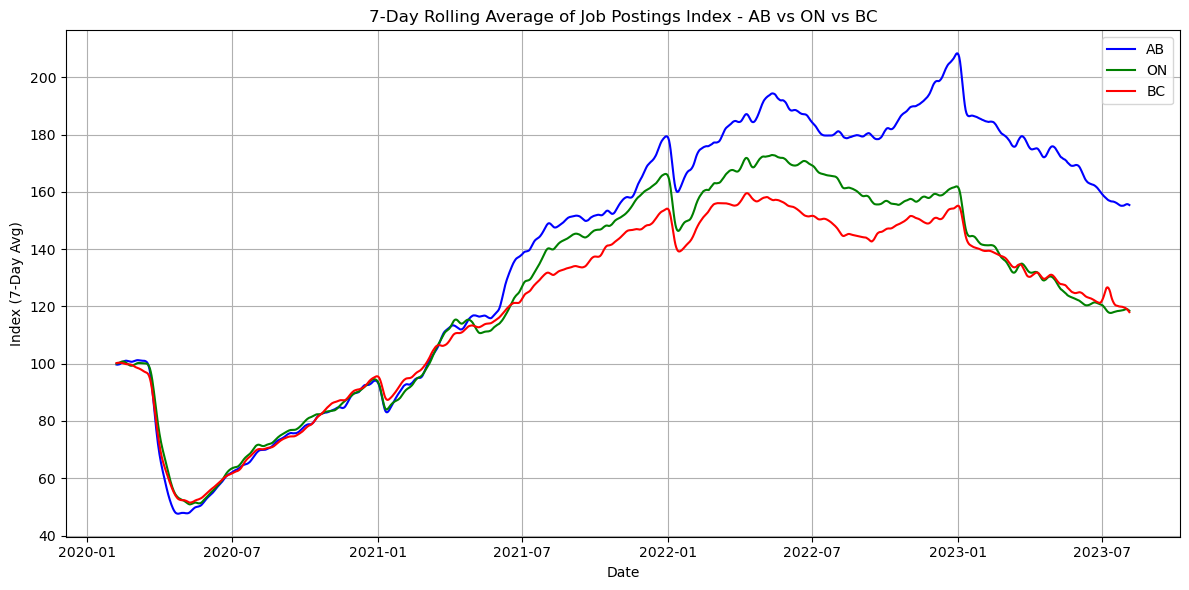

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for prov, color in zip(provinces, colors):
    subset = df[df['province'] == prov].copy()
    subset['rolling'] = subset['indeed_job_postings_index'].rolling(window=7).mean()
    plt.plot(subset['date'], subset['rolling'], label=prov.upper(), color=color)
plt.title('7-Day Rolling Average of Job Postings Index - AB vs ON vs BC')
plt.xlabel('Date')
plt.ylabel('Index (7-Day Avg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
plt.savefig('images/job_index_comparison.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [15]:
plt.savefig('images/job_index-7day.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

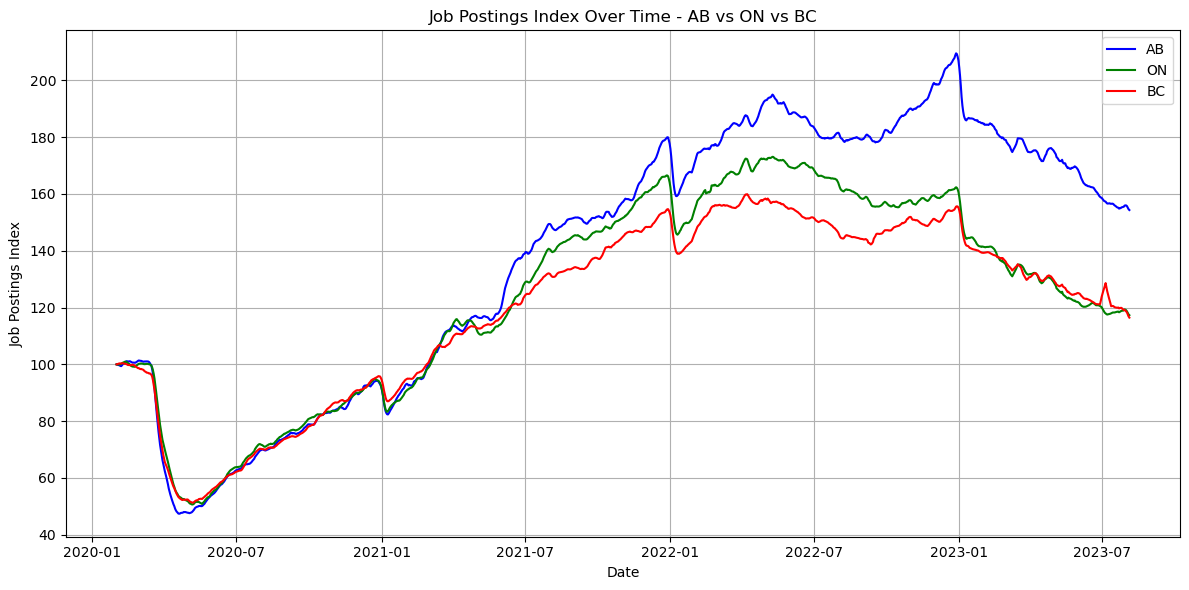

In [16]:
import matplotlib.pyplot as plt
plt.close('all')

provinces = ['ab', 'on', 'bc']
colors = ['blue', 'green', 'red']
plt.figure(figsize=(12,6))
for prov, color in zip(provinces, colors):
    subset = df[df['province'] == prov]
    plt.plot(subset['date'], subset['indeed_job_postings_index'], label=prov.upper(), color=color)
plt.title('Job Postings Index Over Time - AB vs ON vs BC')
plt.xlabel('Date')
plt.ylabel('Job Postings Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('images/job_index_ab_on_bc.png', dpi=300)
plt.show()

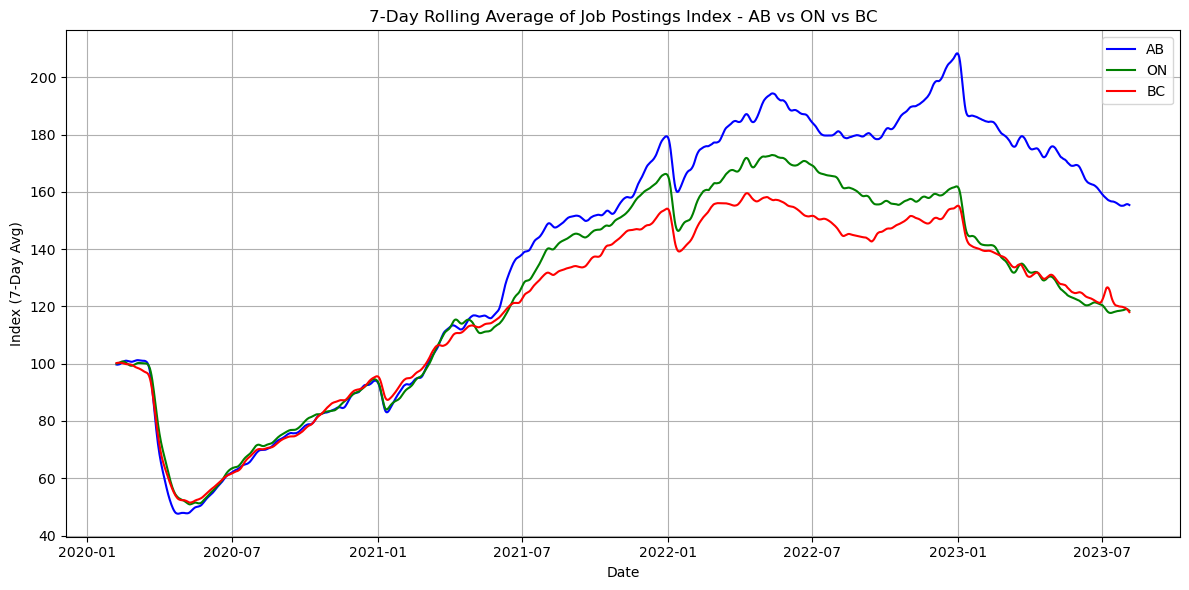

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for prov, color in zip(provinces, colors):
    subset = df[df['province'] == prov].copy()
    subset['rolling'] = subset['indeed_job_postings_index'].rolling(window=7).mean()
    plt.plot(subset['date'], subset['rolling'], label=prov.upper(), color=color)
plt.title('7-Day Rolling Average of Job Postings Index - AB vs ON vs BC')
plt.xlabel('Date')
plt.ylabel('Index (7-Day Avg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('images/job_index_7day.png', dpi=300)
plt.show()